# MLXTEND StackingClassifier

In [1]:
# pip install mlxtend

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

import numpy as np

from sklearn import datasets

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

** Parameters ** 

__classifiers__ : array-like, shape = [n_classifiers]

    A list of classifiers. Invoking the fit method on the StackingClassifer will fit clones of these original classifiers that will be stored in the class attribute self.clfs_.

__meta_classifier__ : object

    The meta-classifier to be fitted on the ensemble of classifiers

__use_probas__ : bool (default: False)

    If True, trains meta-classifier based on predicted probabilities instead of class labels.

__verbose__ : int, optional (default=0)

    Controls the verbosity of the building process. - verbose=0 (default): Prints nothing - verbose=1: Prints the number & name of the regressor being fitted - verbose=2: Prints info about the parameters of the regressor being fitted - verbose>2: Changes verbose param of the underlying regressor to self.verbose - 2

__use_features_in_secondary__ : bool (default: False)

    If True, the meta-classifier will be trained both on the predictions of the original classifiers and the original dataset. 

    If False, the meta-classifier will be trained only on the predictions of the original classifiers.

__store_train_meta_features__ : bool (default: False)

If True, the meta-features computed from the training data used for fitting the meta-classifier stored in the self.train_meta_features_ array, which can be accessed after calling fit.


In [3]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = GaussianNB()

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr,
                          store_train_meta_features=True
                          )

In [4]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, 
                                             X, 
                                             y, 
                                             cv=3, 
                                             scoring='accuracy')
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.02) [KNN]
Accuracy: 0.95 (+/- 0.02) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [StackingClassifier]


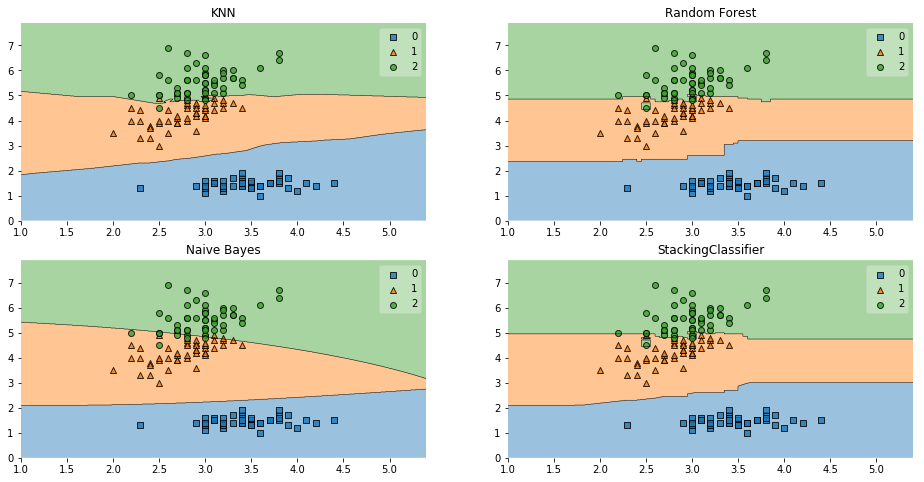

In [5]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    
    ax  = plt.subplot(gs[grd[0], grd[1]])
    
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    
    plt.title(lab)

#### Get the classifiers used in meta model

In [6]:
sclf.classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=3, p=2,
            weights='uniform'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09)]

#### list down parameters of the meta model

In [ ]:
sclf.get_params()

#### get the meta features used by the meta model

In [7]:
print('Number of samples in the meta model : {}'.format(len(sclf.train_meta_features_)))
sclf.train_meta_features_[:5]

Number of samples in the meta model : 150


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [9]:
# predict
y_pred = sclf.predict(X)

print('The accuracy score is : {}'.format(metrics.accuracy_score(y, y_pred)))
print('The Confusion matrix  : \n {}'.format(metrics.confusion_matrix(y, y_pred)))
print('The classification report  : \n {}'.format(metrics.classification_report(y, y_pred)))

The accuracy score is : 0.9866666666666667
The Confusion matrix  : 
 [[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]
The classification report  : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

   micro avg       0.99      0.99      0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

